In [1]:
import pandas as pd
pd.set_option('display.max_columns',70)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api  as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [3]:
df=pd.read_csv('online_shoppers_intention.csv',header = 2)
df.drop(['Unnamed: 18','Administrative.1','Unnamed: 20'], axis = 1, inplace = True)
df2 = df.copy()

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
def bool_converter(x):
    if x == True:
        return 1
    else:
        return 0
# converting bool type True into 1 and False into 0 
df2['Weekend'] = df2['Weekend'].apply(bool_converter)
df2['Revenue'] = df2['Revenue'].apply(bool_converter)

In [7]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [8]:
visitor = pd.get_dummies(df2['VisitorType'])

In [9]:
df2 = pd.concat((df2, visitor), axis = 1)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,0,0,1


In [10]:
df2.drop('VisitorType', axis = 1, inplace = True)
df2.drop('Other', axis = 1, inplace=True)

In [11]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,1,0,0,1


In [12]:
Traffic = pd.get_dummies(df2['TrafficType']).values
Traffic_df = pd.DataFrame(Traffic, columns=['Traffic_type_1','Traffic_type_2',
                                            'Traffic_type_3','Traffic_type_4','Traffic_type_5','Traffic_type_6','Traffic_type_7',
                                            'Traffic_type_8','Traffic_type_9','Traffic_type_10','Traffic_type_11','Traffic_type_12',
                                            'Traffic_type_13','Traffic_type_14','Traffic_type_15','Traffic_type_16','Traffic_type_17',
                                            'Traffic_type_18','Traffic_type_19','Traffic_type_20'])
df2 = pd.concat((df2, Traffic_df), axis = 1)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,New_Visitor,Returning_Visitor,Traffic_type_1,Traffic_type_2,Traffic_type_3,Traffic_type_4,Traffic_type_5,Traffic_type_6,Traffic_type_7,Traffic_type_8,Traffic_type_9,Traffic_type_10,Traffic_type_11,Traffic_type_12,Traffic_type_13,Traffic_type_14,Traffic_type_15,Traffic_type_16,Traffic_type_17,Traffic_type_18,Traffic_type_19,Traffic_type_20
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df2.drop(['Traffic_type_20','TrafficType'], axis = 1, inplace = True)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,Weekend,Revenue,New_Visitor,Returning_Visitor,Traffic_type_1,Traffic_type_2,Traffic_type_3,Traffic_type_4,Traffic_type_5,Traffic_type_6,Traffic_type_7,Traffic_type_8,Traffic_type_9,Traffic_type_10,Traffic_type_11,Traffic_type_12,Traffic_type_13,Traffic_type_14,Traffic_type_15,Traffic_type_16,Traffic_type_17,Traffic_type_18,Traffic_type_19
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
Month = pd.get_dummies(df2['Month'])
df2 = pd.concat((df2,Month), axis = 1)

df2.drop(['Month','Feb'], axis = 1, inplace = True)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,Weekend,Revenue,New_Visitor,Returning_Visitor,Traffic_type_1,Traffic_type_2,Traffic_type_3,Traffic_type_4,Traffic_type_5,Traffic_type_6,Traffic_type_7,Traffic_type_8,Traffic_type_9,Traffic_type_10,Traffic_type_11,Traffic_type_12,Traffic_type_13,Traffic_type_14,Traffic_type_15,Traffic_type_16,Traffic_type_17,Traffic_type_18,Traffic_type_19,Aug,Dec,Jul,June,Mar,May,Nov,Oct,Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df2['SpecialDay'] = df2['SpecialDay'].apply(lambda x: 1 if x>0.4 else 0)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,Weekend,Revenue,New_Visitor,Returning_Visitor,Traffic_type_1,Traffic_type_2,Traffic_type_3,Traffic_type_4,Traffic_type_5,Traffic_type_6,Traffic_type_7,Traffic_type_8,Traffic_type_9,Traffic_type_10,Traffic_type_11,Traffic_type_12,Traffic_type_13,Traffic_type_14,Traffic_type_15,Traffic_type_16,Traffic_type_17,Traffic_type_18,Traffic_type_19,Aug,Dec,Jul,June,Mar,May,Nov,Oct,Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,2,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,4,1,9,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,3,2,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,3,3,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
Region_Names = ['Region_1','Region_2', 'Region_3','Region_4','Region_5','Region_6','Region_7','Region_8','Region_9']
Region = pd.get_dummies(df2['Region']).values
Region_df = pd.DataFrame(Region, columns = Region_Names )
df2 = pd.concat((df2, Region_df), axis = 1)
df2.drop(['Region','Region_9'], axis = 1, inplace = True)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Weekend,Revenue,New_Visitor,Returning_Visitor,Traffic_type_1,Traffic_type_2,Traffic_type_3,Traffic_type_4,Traffic_type_5,Traffic_type_6,Traffic_type_7,Traffic_type_8,Traffic_type_9,Traffic_type_10,Traffic_type_11,Traffic_type_12,Traffic_type_13,Traffic_type_14,Traffic_type_15,Traffic_type_16,Traffic_type_17,Traffic_type_18,Traffic_type_19,Aug,Dec,Jul,June,Mar,May,Nov,Oct,Sep,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,2,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,3,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,3,3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [17]:
Browser_Names = ['Browser_1','Browser_2','Browser_3','Browser_4','Browser_5','Browser_6','Browser_7','Browser_8','Browser_9','Browser_10',
                'Browser_11','Browser_12','Browser_13']
Browser = pd.get_dummies(df2['Browser']).values
Browser_df = pd.DataFrame(Browser, columns =Browser_Names )
df2 = pd.concat((df2, Browser_df), axis = 1)
df2.drop(['Browser','Browser_13'], axis = 1, inplace = True)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Weekend,Revenue,New_Visitor,Returning_Visitor,Traffic_type_1,Traffic_type_2,Traffic_type_3,Traffic_type_4,Traffic_type_5,Traffic_type_6,Traffic_type_7,Traffic_type_8,Traffic_type_9,Traffic_type_10,Traffic_type_11,Traffic_type_12,Traffic_type_13,Traffic_type_14,Traffic_type_15,Traffic_type_16,Traffic_type_17,Traffic_type_18,Traffic_type_19,Aug,Dec,Jul,June,Mar,May,Nov,Oct,Sep,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [18]:
Opsys_Names = ['OperatingSystem_1','OperatingSystem_2','OperatingSystem_3','OperatingSystem_4','OperatingSystem_5','OperatingSystem_6'
              ,'OperatingSystem_7','OperatingSystem_8']
Opsys = pd.get_dummies(df2['OperatingSystems']).values
Opsys_df = pd.DataFrame(Opsys, columns = Opsys_Names )
df2 = pd.concat((df2, Opsys_df), axis = 1)
df2.drop(['OperatingSystems','OperatingSystem_8'], axis = 1, inplace = True)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,New_Visitor,Returning_Visitor,Traffic_type_1,Traffic_type_2,Traffic_type_3,Traffic_type_4,Traffic_type_5,Traffic_type_6,Traffic_type_7,Traffic_type_8,Traffic_type_9,Traffic_type_10,Traffic_type_11,Traffic_type_12,Traffic_type_13,Traffic_type_14,Traffic_type_15,Traffic_type_16,Traffic_type_17,Traffic_type_18,Traffic_type_19,Aug,Dec,Jul,June,Mar,May,Nov,Oct,Sep,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,OperatingSystem_1,OperatingSystem_2,OperatingSystem_3,OperatingSystem_4,OperatingSystem_5,OperatingSystem_6,OperatingSystem_7
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
df2.shape

(12330, 69)

In [20]:
num_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

cat_features = ['SpecialDay', 'Weekend',
       'Revenue', 'New_Visitor', 'Returning_Visitor', 'Traffic_type_1',
       'Traffic_type_2', 'Traffic_type_3', 'Traffic_type_4', 'Traffic_type_5',
       'Traffic_type_6', 'Traffic_type_7', 'Traffic_type_8', 'Traffic_type_9',
       'Traffic_type_10', 'Traffic_type_11', 'Traffic_type_12',
       'Traffic_type_13', 'Traffic_type_14', 'Traffic_type_15',
       'Traffic_type_16', 'Traffic_type_17', 'Traffic_type_18',
       'Traffic_type_19', 'Aug', 'Dec', 'Jul', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Browser_1',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'OperatingSystem_1', 'OperatingSystem_2',
       'OperatingSystem_3', 'OperatingSystem_4', 'OperatingSystem_5',
       'OperatingSystem_6', 'OperatingSystem_7']

num_df = df2[num_features]
cat_df = df2[cat_features]

ss = StandardScaler()
num_df_scaled = ss.fit_transform(num_df)
num_df_scaled = pd.DataFrame(num_df_scaled, columns = num_features)
new_df = pd.concat((num_df_scaled, cat_df), axis = 1)

In [23]:
### Applying smote on train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

#### Logistic Regression Statsmodel

In [24]:
X = new_df.drop('Revenue', axis = 1)
y = new_df['Revenue']
X_c = sm.add_constant(X)
log_reg = sm.Logit(y,X_c).fit()
log_reg.summary()

         Current function value: 0.287056
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12262
Method:                           MLE   Df Model:                           67
Date:                Thu, 28 Nov 2019   Pseudo R-squ.:                  0.3337
Time:                        14:31:20   Log-Likelihood:                -3539.4
converged:                      False   LL-Null:                       -5312.4
                                        LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.7042      0.801     -4.622      0.000      -5.275      -2.134
Administrative              0.0106      0.037      0.287      0.774      -0.062       0.083
Administrative_Duration    -0.0174      0.034     -0.507      0.612      -0.085       0.050
Informational               0.0404      0.035      1.169      0.242      -0.027       0.108
Informational_Duration      0.0072      0.032      0.228      0.820      -0.055       0.069
ProductRelated              0.0826      0.052      1.590      0.112      -0.019       0.184
ProductRelated_Duration     0.1147      0.052      2.192      0.028       0.012       0.217
BounceRates                -0.0826      0.156     -0.528      0.597      -0.389       0.224
ExitRates                  -0.7457      0.119     -6.279      0.000      -0.978      -0.513
PageValues                  1.5213      0.045     33.685      0.000       1.433       1.610
SpecialDay                  0.0102      0.181      0.056      0.955      -0.345       0.365
Weekend                     0.0888      0.073      1.224      0.221      -0.053       0.231
New_Visitor                 0.6558      0.706      0.929      0.353      -0.727       2.039
Returning_Visitor           0.4450      0.722      0.616      0.538      -0.971       1.860
Traffic_type_1             -0.4802      0.269     -1.782      0.075      -1.008       0.048
Traffic_type_2             -0.2968      0.258     -1.150      0.250      -0.803       0.209
Traffic_type_3             -0.7120      0.274     -2.596      0.009      -1.249      -0.175
Traffic_type_4             -0.4331      0.282     -1.534      0.125      -0.987       0.120
Traffic_type_5             -0.2291      0.323     -0.710      0.478      -0.862       0.404
Traffic_type_6             -0.5654      0.312     -1.812      0.070      -1.177       0.046
Traffic_type_7             -0.1452      0.536     -0.271      0.787      -1.197       0.906
Traffic_type_8              0.1320      0.305      0.433      0.665      -0.465       0.729
Traffic_type_9             -0.4744      0.725     -0.654      0.513      -1.896       0.947
Traffic_type_10            -0.0975      0.298     -0.327      0.744      -0.682       0.487
Traffic_type_11            -0.0660      0.329     -0.201      0.841      -0.711       0.578
Traffic_type_12          -619.0733  1.26e+135 -4.92e-133      1.000  -2.47e+135   2.47e+135
Traffic_type_13            -1.0100      0.317     -3.181      0.001      -1.632      -0.388
Traffic_type_14            -1.0458      1.158     -0.903      0.366      -3.315       1.223
Traffic_type_15           -26.1139   2.86e+05  -9.13e-05      1.000    -5.6e+05     5.6e+05
Traffic_type_16             1.4653      1.264      1.159      0.247      -1.013       3.944
Traffic_type_17          -142.1023   3.67e+31  -3.87e-30      1.000    -7.2e+31     7.2e+31
Traffic_type_18          -228.8273   5.57e+49   -4.1e-48      1.000   -1.09e+50    1.09e+50
Traffic_type_19      

### Decision Tree(with hyper parameter tuning) without smote

In [26]:

param_grid = {'criterion':['gini','entropy'],
             'splitter':['best','random'],
             'max_depth':range(1,100,10),
             'max_leaf_nodes': range(2,100,10),
             }
gs =GridSearchCV(DecisionTreeClassifier(),param_grid= param_grid, cv = 5, n_jobs = -1, scoring = 'recall')
gs.fit(X_train, y_train)
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'splitter': 'best'}

In [27]:
from sklearn import metrics
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('ROC_AUC_score : ', metrics.roc_auc_score(y_test, y_pred_proba[:,1]))
print('TPR or sensitivity or recall : ', metrics.recall_score(y_test, y_pred))
print('Precision : ', metrics.precision_score(y_test, y_pred))
print('f1_score : ',metrics.f1_score(y_test, y_pred))


[[1823  232]
 [  84  327]]
Accuracy :  0.8718572587185726
ROC_AUC_score :  0.8413625304136253
TPR or sensitivity or recall :  0.7956204379562044
Precision :  0.5849731663685152
f1_score :  0.6742268041237113


### Decision Tree (with hyperparameter tuning) with smote

In [28]:
param_grid = {'criterion':['gini','entropy'],
             'splitter':['best','random'],
             'max_depth':range(1,100,10),
             'max_leaf_nodes': range(2,100,10),
             }
gs =GridSearchCV(DecisionTreeClassifier(),param_grid= param_grid, cv = 5, n_jobs = -1, scoring = 'recall')
gs.fit(X_train_smt, y_train_smt)
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 61,
 'max_leaf_nodes': 2,
 'splitter': 'random'}

In [29]:
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(X_train_smt, y_train_smt)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('ROC_AUC_score : ', metrics.roc_auc_score(y_test, y_pred_proba[:,1]))
print('TPR or sensitivity or recall : ', metrics.recall_score(y_test, y_pred))
print('Precision : ', metrics.precision_score(y_test, y_pred))
print('f1_score : ',metrics.f1_score(y_test, y_pred))


[[1260  795]
 [ 134  277]]
Accuracy :  0.6232765612327656
ROC_AUC_score :  0.643552311435523
TPR or sensitivity or recall :  0.6739659367396593
Precision :  0.2583955223880597
f1_score :  0.3735670937289279


### Random Forest(with hyper parameter tuning) without smote

In [30]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'criterion':['gini','entropy'],
             'n_estimators':range(50,100,10),
             'max_depth':range(5,10),
             'max_leaf_nodes': range(2,100,10),
             }
gs =GridSearchCV(RandomForestClassifier(),param_grid= param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')
gs.fit(X_train, y_train)
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_leaf_nodes': 82,
 'n_estimators': 90}

In [31]:
rf = RandomForestClassifier(**gs.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('ROC_AUC_score : ', metrics.roc_auc_score(y_test, y_pred_proba[:,1]))
print('TPR or sensitivity or recall : ', metrics.recall_score(y_test, y_pred))
print('Precision : ', metrics.precision_score(y_test, y_pred))
print('f1_score : ',metrics.f1_score(y_test, y_pred))


[[2035   20]
 [ 289  122]]
Accuracy :  0.8746958637469586
ROC_AUC_score :  0.9214733514483101
TPR or sensitivity or recall :  0.29683698296836986
Precision :  0.8591549295774648
f1_score :  0.4412296564195299


### Random Forst (with hyperparameter tuning) with SMOTE

In [33]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'criterion':['gini','entropy'],
             'n_estimators':range(50,100,10),
             'max_depth':range(5,10),
             'max_leaf_nodes': range(30,100,10),
             }
gs =GridSearchCV(RandomForestClassifier(),param_grid= param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')
gs.fit(X_train_smt, y_train_smt)
gs.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 80, 'n_estimators': 70}

In [34]:
rf = RandomForestClassifier(**gs.best_params_)
rf.fit(X_train_smt, y_train_smt)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('ROC_AUC_score : ', metrics.roc_auc_score(y_test, y_pred_proba[:,1]))
print('TPR or sensitivity or recall : ', metrics.recall_score(y_test, y_pred))
print('Precision : ', metrics.precision_score(y_test, y_pred))
print('f1_score : ',metrics.f1_score(y_test, y_pred))


[[1847  208]
 [  88  323]]
Accuracy :  0.8799675587996756
ROC_AUC_score :  0.9209026704790997
TPR or sensitivity or recall :  0.7858880778588808
Precision :  0.608286252354049
f1_score :  0.6857749469214437


### DT_BAGGING (without SMOTE)

In [30]:
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(criterion= 'gini', max_depth =  11, max_leaf_nodes = 12, splitter = 'best')
bg_dt_clf = BaggingClassifier(dt, n_estimators=200,n_jobs=-1)
bg_dt_clf.fit(X_train, y_train)
y_pred = bg_dt_clf.predict(X_test)
y_pred_proba = bg_dt_clf.predict_proba(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('ROC_AUC_score : ', metrics.roc_auc_score(y_test, y_pred_proba[:,1]))
print('TPR or sensitivity or recall : ', metrics.recall_score(y_test, y_pred))
print('Precision : ', metrics.precision_score(y_test, y_pred))
print('f1_score : ',metrics.f1_score(y_test, y_pred))

[[1976   79]
 [ 182  229]]
Accuracy :  0.8941605839416058
ROC_AUC_score :  0.9119837083607131
TPR or sensitivity or recall :  0.5571776155717761
Precision :  0.7435064935064936
f1_score :  0.6369958275382476


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_dt_ws, tpr_dt_ws, thresholds = roc_curve(y_test, y_pred_proba[:,1])


### DT_bagging(with SMOTE)

In [32]:
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(criterion= 'gini', max_depth =  11, max_leaf_nodes = 12, splitter = 'best')
bg_dt_clf = BaggingClassifier(dt, n_estimators=200,n_jobs=-1)
bg_dt_clf.fit(X_train_smt, y_train_smt)
y_pred = bg_dt_clf.predict(X_test)
y_pred_proba = bg_dt_clf.predict_proba(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('ROC_AUC_score : ', metrics.roc_auc_score(y_test, y_pred_proba[:,1]))
print('TPR or sensitivity or recall : ', metrics.recall_score(y_test, y_pred))
print('Precision : ', metrics.precision_score(y_test, y_pred))
print('f1_score : ',metrics.f1_score(y_test, y_pred))

[[1848  207]
 [  92  319]]
Accuracy :  0.8787510137875101
ROC_AUC_score :  0.9157168143688471
TPR or sensitivity or recall :  0.7761557177615572
Precision :  0.6064638783269962
f1_score :  0.6808964781216649


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_dt_sm, tpr_dt_sm, thresholds = roc_curve(y_test, y_pred_proba[:,1])


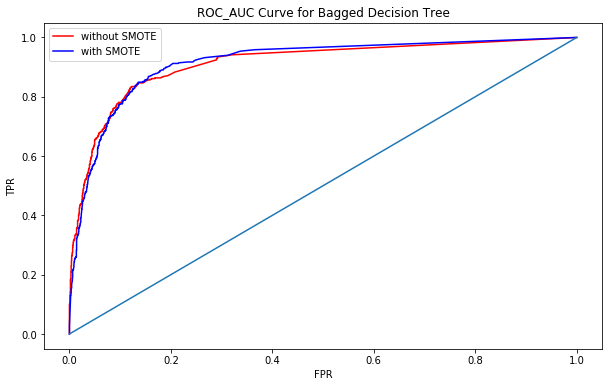

In [42]:
plt.figure(figsize = (10,6))
plt.plot(fpr_dt_ws, tpr_dt_ws, color = 'r',label = 'without SMOTE')
plt.plot(fpr_dt_sm,tpr_dt_sm,color = 'b',label = 'with SMOTE')
plt.plot(fpr_dt_sm,fpr_dt_sm)
plt.legend()
plt.title('ROC_AUC Curve for Bagged Decision Tree')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### DT_Boost(Adaboost) (without SMOTE)

In [40]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth =  11, max_leaf_nodes = 12, splitter = 'best')
bst_dt_clf = AdaBoostClassifier(dt, n_estimators=100)
bst_dt_clf.fit(X_train, y_train)
y_pred = bst_dt_clf.predict(X_test)
y_pred_proba = bst_dt_clf.predict_proba(X_test)
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('ROC_AUC_score : ', metrics.roc_auc_score(y_test, y_pred_proba[:,1]))
print('TPR or sensitivity or recall : ', metrics.recall_score(y_test, y_pred))
print('Precision : ', metrics.precision_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print('f1_score : ',metrics.f1_score(y_test, y_pred))

Accuracy :  0.8751013787510138
ROC_AUC_score :  0.8762202449665819
TPR or sensitivity or recall :  0.5352798053527981
Precision :  0.6528189910979229
[[1938  117]
 [ 191  220]]
f1_score :  0.5882352941176471


### DT_Boost(Adaboost) with SMOTE

In [51]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth =  11, max_leaf_nodes = 12, splitter = 'best')
bst_dt_clf = AdaBoostClassifier(dt, n_estimators=100)
bst_dt_clf.fit(X_train_smt, y_train_smt)
y_pred = bst_dt_clf.predict(X_test)
y_pred_proba = bst_dt_clf.predict_proba(X_test)
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('ROC_AUC_score : ', metrics.roc_auc_score(y_test, y_pred_proba[:,1]))
print('TPR or sensitivity or recall : ', metrics.recall_score(y_test, y_pred))
print('Precision : ', metrics.precision_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print('f1_score : ',metrics.f1_score(y_test, y_pred))

Accuracy :  0.8690186536901865
ROC_AUC_score :  0.8782022365484458
TPR or sensitivity or recall :  0.5523114355231143
Precision :  0.6202185792349727
[[1916  139]
 [ 184  227]]
f1_score :  0.5842985842985843


### Gradient_Boosting (with hyperparameter tuning) without SMOTE

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
param_grid = {'learning_rate':[0.05,0.08,0.1,1.2,1.8],
              'n_estimators':[3,4,5,6],
              
              }
gs =GridSearchCV(gb_clf, param_grid = param_grid, cv = 5, scoring = 'accuracy')
gs.fit(X_train, y_train)
gs.best_params_

{'learning_rate': 1.2, 'n_estimators': 4}

In [53]:
gb_clf = GradientBoostingClassifier(**gs.best_params_)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
y_pred_proba = gb_clf.predict_proba(X_test)
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('ROC_AUC_score : ', metrics.roc_auc_score(y_test, y_pred_proba[:,1]))
print('TPR or sensitivity or recall : ', metrics.recall_score(y_test, y_pred))
print('Precision : ', metrics.precision_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print('f1_score : ',metrics.f1_score(y_test, y_pred))

Accuracy :  0.8848337388483374
ROC_AUC_score :  0.9173039468153754
TPR or sensitivity or recall :  0.46958637469586373
Precision :  0.7451737451737451
[[1989   66]
 [ 218  193]]
f1_score :  0.5761194029850746


### Gradient_Boosting(with hyperparameter tuning) with SMOTE

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
param_grid = {'learning_rate':[0.05,0.08,0.1,1.2,1.8],
              'n_estimators':[3,4,5,6],
              
              }
gs =GridSearchCV(gb_clf, param_grid = param_grid, cv = 5, scoring = 'accuracy')
gs.fit(X_train_smt, y_train_smt)
gs.best_params_

{'learning_rate': 1.2, 'n_estimators': 6}

In [55]:
gb_clf = GradientBoostingClassifier(**gs.best_params_)
gb_clf.fit(X_train_smt, y_train_smt)
y_pred = gb_clf.predict(X_test)
y_pred_proba = gb_clf.predict_proba(X_test)
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('ROC_AUC_score : ', metrics.roc_auc_score(y_test, y_pred_proba[:,1]))
print('TPR or sensitivity or recall : ', metrics.recall_score(y_test, y_pred))
print('Precision : ', metrics.precision_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print('f1_score : ',metrics.f1_score(y_test, y_pred))

Accuracy :  0.8844282238442822
ROC_AUC_score :  0.9175318640074354
TPR or sensitivity or recall :  0.7226277372262774
Precision :  0.6346153846153846
[[1884  171]
 [ 114  297]]
f1_score :  0.6757679180887372


### XGBClassifier without SMOTE

In [60]:
xgb_clf = XGBClassifier(max_depth = 15, learning_rate = 0.12, n_estimators = 100)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('ROC_AUC_score : ', metrics.roc_auc_score(y_test, y_pred_proba[:,1]))
print('TPR or sensitivity or recall : ', metrics.recall_score(y_test, y_pred))
print('Precision : ', metrics.precision_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print('f1_score : ',metrics.f1_score(y_test, y_pred))

Accuracy :  0.8888888888888888
ROC_AUC_score :  0.9219256338761908
TPR or sensitivity or recall :  0.5717761557177615
Precision :  0.7057057057057057
[[1957   98]
 [ 176  235]]
f1_score :  0.6317204301075269
